In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as itt
import time
from perceptron import Perceptron

In [2]:
root_path_A = '/Users/Alberto/Documents/Università/Leiden/DLNN/assignment 1'

#Import the test and training data
test_in = np.loadtxt(root_path_A + '/data/test_in.csv', delimiter=',')
test_out = np.loadtxt(root_path_A + '/data/test_out.csv', delimiter=',', dtype=int)
train_in = np.loadtxt(root_path_A + '/data/train_in.csv', delimiter=',')
train_out = np.loadtxt(root_path_A + '/data/train_out.csv', delimiter=',', dtype=int)

number_train = [len(train_out[np.where(train_out == i)]) for i in range(10)]

#list of all the pictures for each digit, ordered by digit (0 to 9)
sorted_list = [[train_in[img] for img in np.where(train_out == digit)[0]]
             for digit in range(10)]

#list of all the digits (0 to 9)
digits = [dig for dig in range(10)]

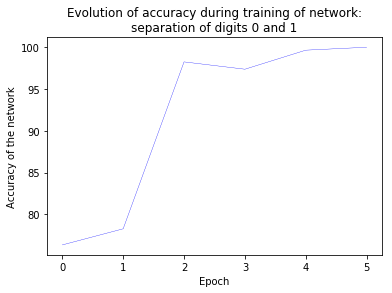

Epochs: 6.0


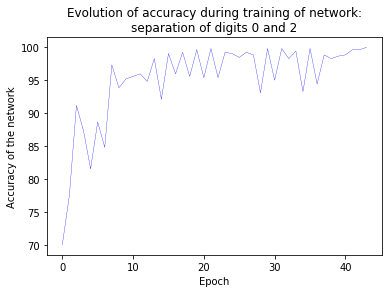

Epochs: 44.0


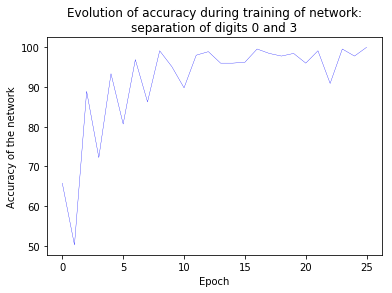

Epochs: 26.0


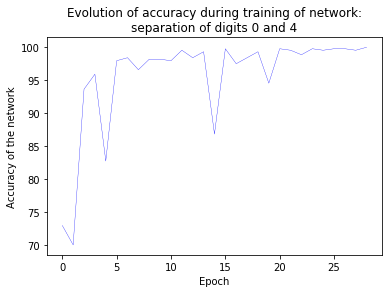

Epochs: 29.0


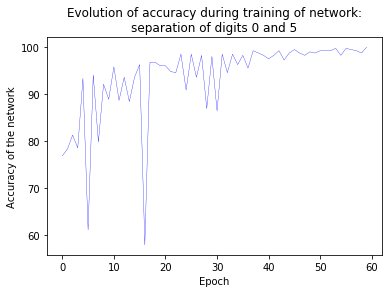

Epochs: 60.0


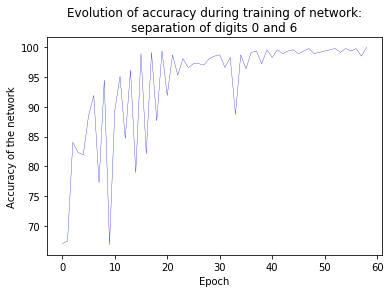

Epochs: 59.0


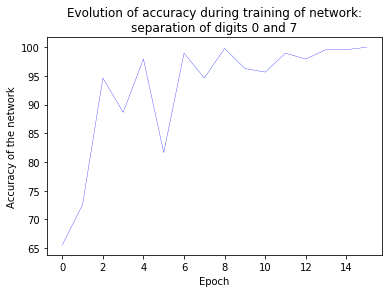

Epochs: 16.0


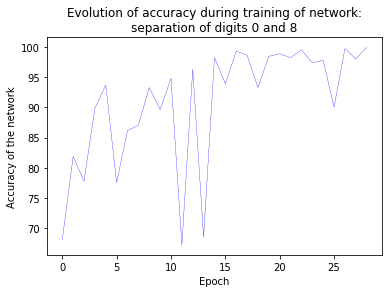

Epochs: 29.0


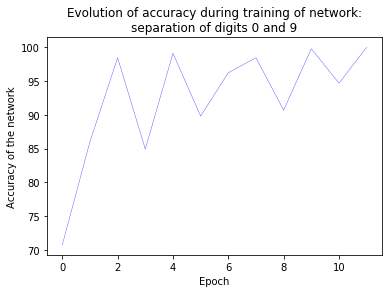

Epochs: 12.0


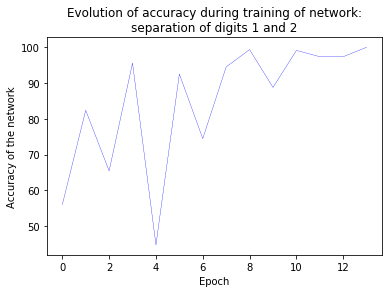

Epochs: 14.0


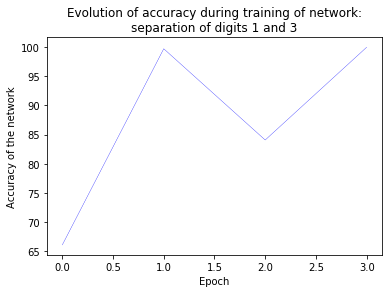

Epochs: 4.0


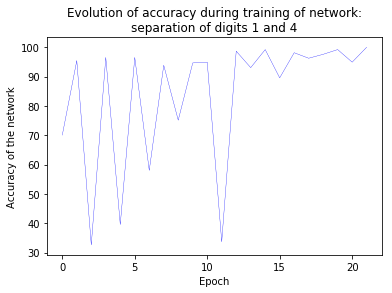

Epochs: 22.0


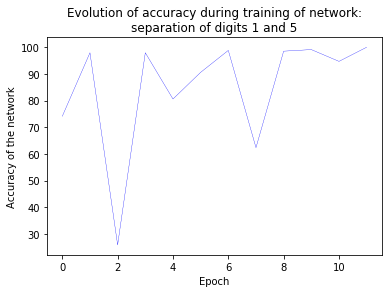

Epochs: 12.0


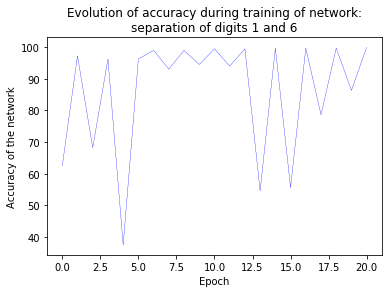

Epochs: 21.0


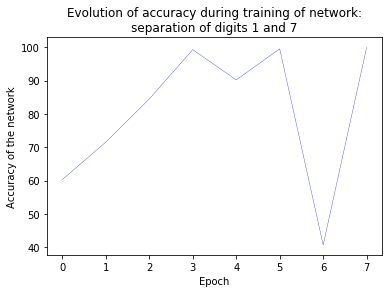

Epochs: 8.0


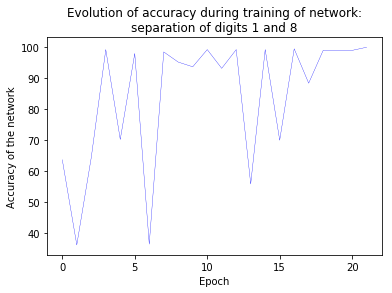

Epochs: 22.0


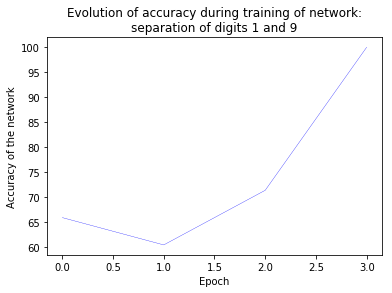

Epochs: 4.0


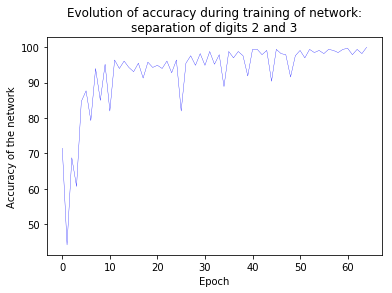

Epochs: 65.0


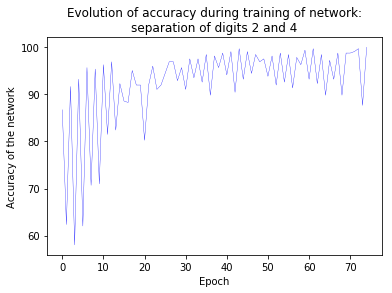

Epochs: 75.0


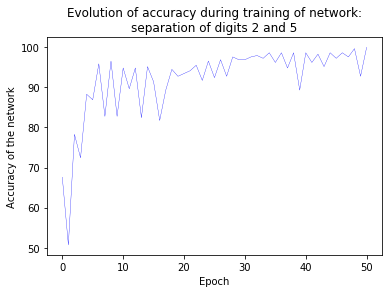

Epochs: 51.0


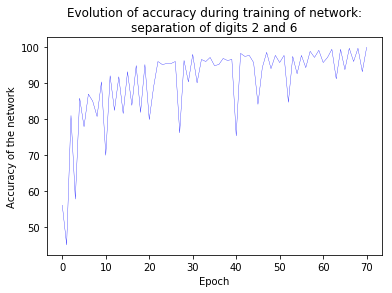

Epochs: 71.0


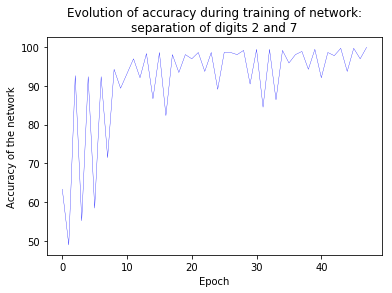

Epochs: 48.0


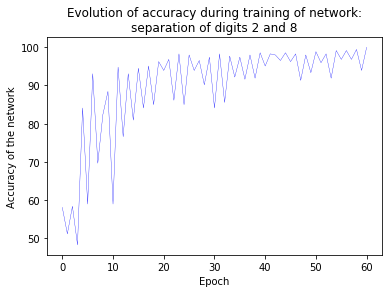

Epochs: 61.0


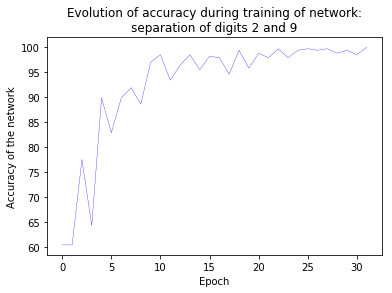

Epochs: 32.0


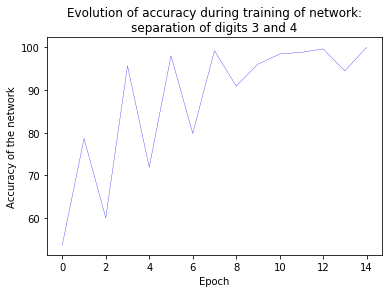

Epochs: 15.0


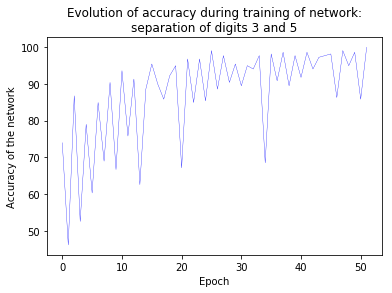

Epochs: 52.0


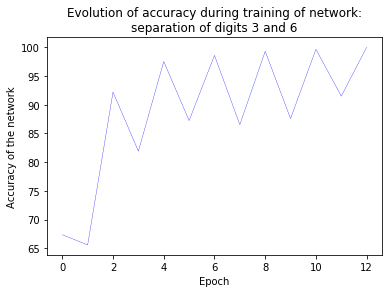

Epochs: 13.0


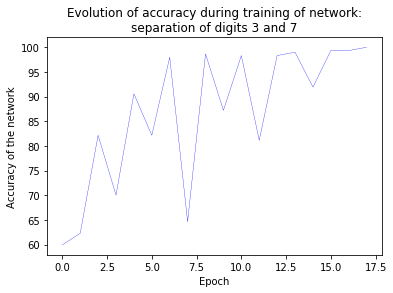

Epochs: 18.0


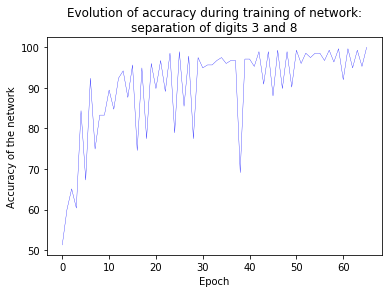

Epochs: 66.0


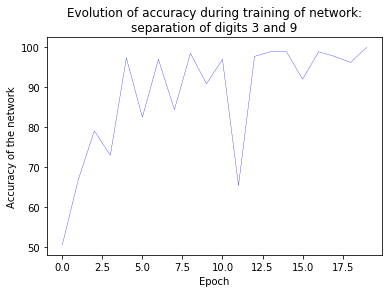

Epochs: 20.0


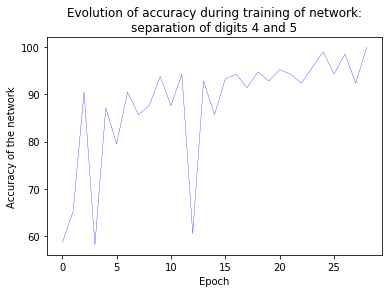

Epochs: 29.0


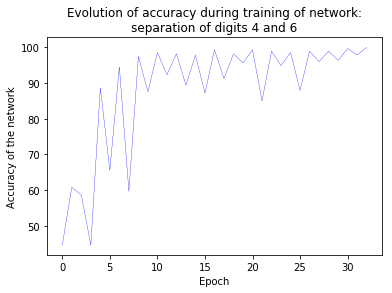

Epochs: 33.0


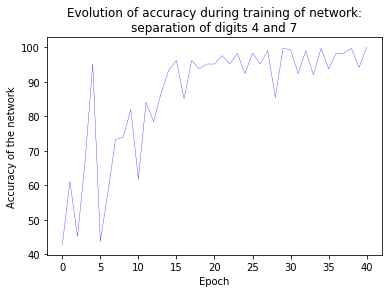

Epochs: 41.0


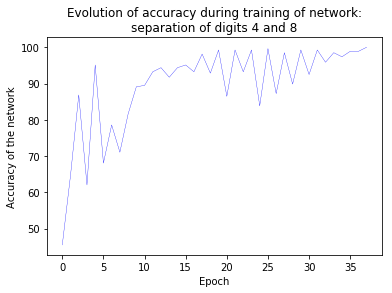

Epochs: 38.0


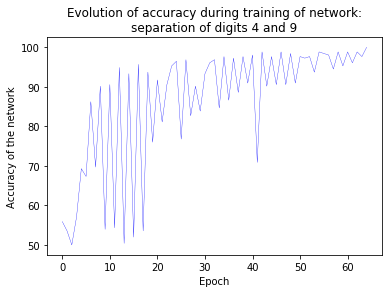

Epochs: 65.0


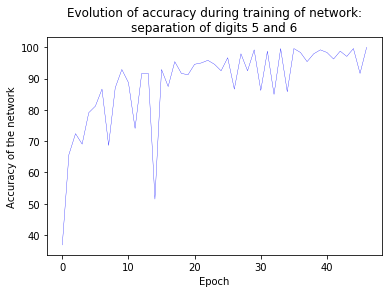

Epochs: 47.0


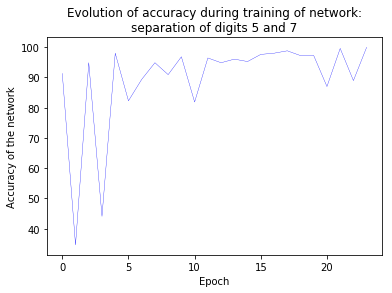

Epochs: 24.0


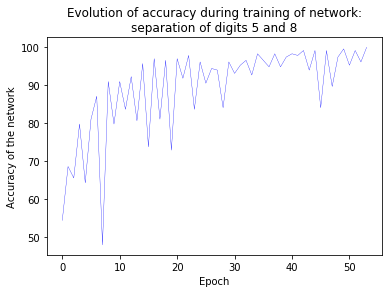

Epochs: 54.0


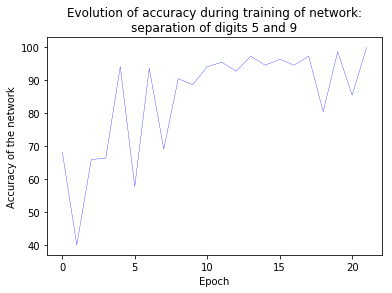

Epochs: 22.0


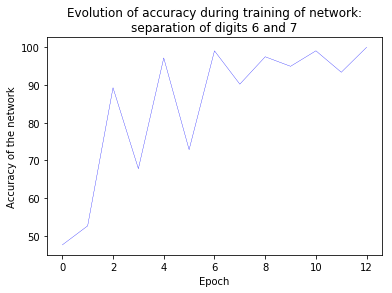

Epochs: 13.0


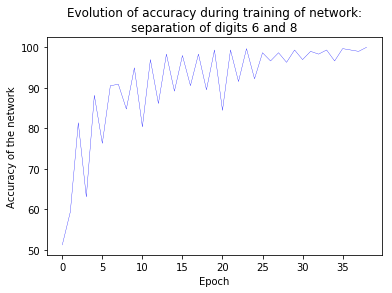

Epochs: 39.0


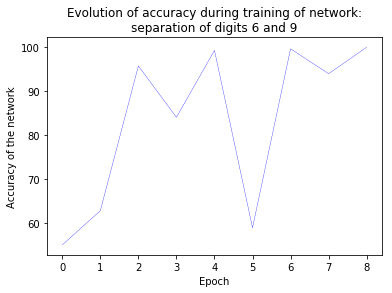

Epochs: 9.0


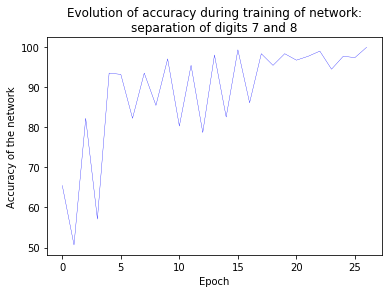

Epochs: 27.0


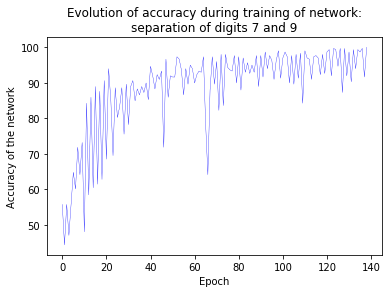

Epochs: 139.0


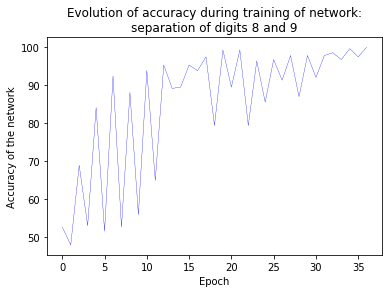

Epochs: 37.0


In [5]:
np.random.seed(45)

#list of all the possible combinations of two elements of digits
comb_digits = list(itt.combinations(digits, 2))

#initializes the network with the training set data
perc = Perceptron(train_in, verbose=False)

#for cycle over all the possible two elements combinations
for couple in comb_digits:
    
    #converts the network into a two class network, the two classes being the first and the
    #second value of the tuple of the current digits combinations
    perc.to_single_class(couple[0], couple[1])
    
    #list of the expected labels with two possible values: class_1 and class_2
    expected_labels = [perc.class_1 for i in range(len(sorted_list[perc.class_1]))]\
                      + [perc.class_2 for i in range(len(sorted_list[perc.class_2]))]
    
    #list of all the pictures corresponding to the two digits (class_1 and class_2)
    reduced_list = sorted_list[perc.class_1] + sorted_list[perc.class_2]
    
    #updates the new list of pictures into the network and resets the weights
    perc.update_data(reduced_list, reset_weights=True)
    
    #trains the network, separating class_1 from class_2
    current_acc, epochs, _ = perc.train(expected_labels, shuffle=True)
    
    #plots the evolution of accuracy during the training of the network
    plt.figure()
    plt.plot(np.arange(len(current_acc)), current_acc, linewidth=.3, color='blue')
    plt.title("Evolution of accuracy during training of network:\nseparation of digits {} and {}"\
              .format(perc.class_1, perc.class_2))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy of the network")
    plt.savefig('separ'+str(couple)+'.png')
    plt.show()
    
    print('Epochs at 100% accuracy: {}'.format(epochs))

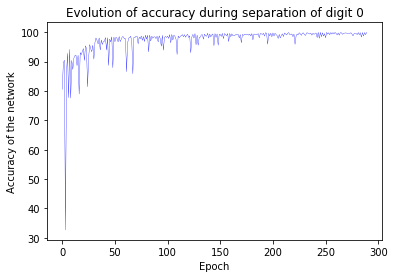

Epochs: 290.0


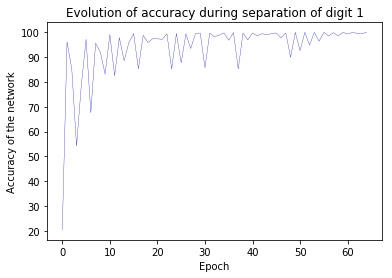

Epochs: 65.0


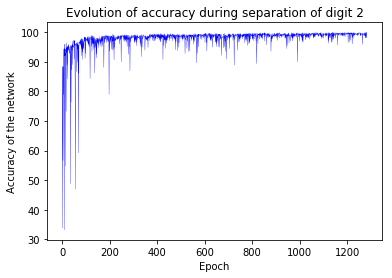

Epochs: 1283.0


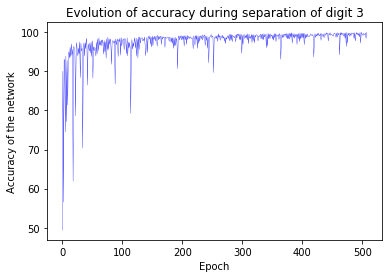

Epochs: 508.0


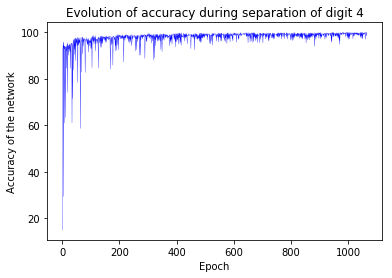

Epochs: 1066.0


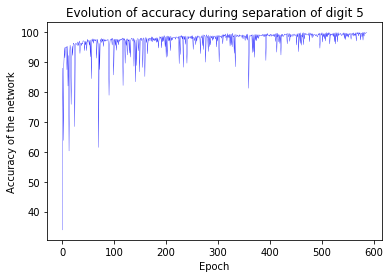

Epochs: 587.0


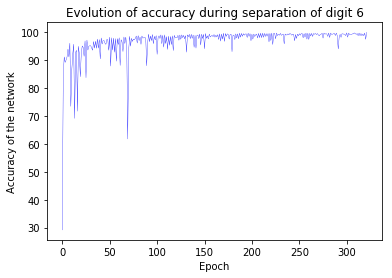

Epochs: 322.0


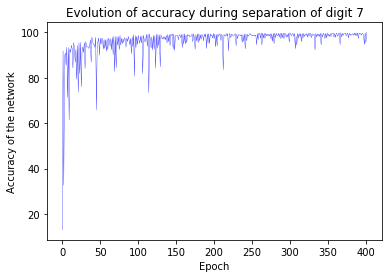

Epochs: 402.0


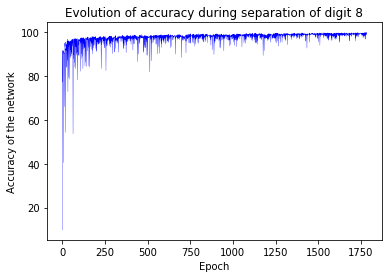

Epochs: 1785.0


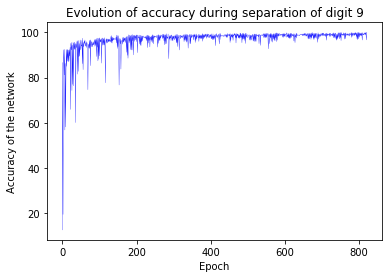

Epochs: 821.0


In [8]:
np.random.seed(45)

#initializes the network with the training set data
perc = Perceptron(train_in, learning_rate=1., epoch_threshold=5000, verbose=False)

#for cycle over all digits to separate from the remaining ones (one digit from the 9 remaining)
for digit in range(10):
    
    #creates an ordered list of all the images, putting on front all the images of the digit
    
    #copy of the sorted list
    _list = sorted_list.copy()
    
    #list without all pictures corresponding to the current digit to separate
    _list.pop(digit)
    
    #list with the 9 list of pictures, one for each digit
    input_list = []
    input_list.append(sorted_list[digit])
    for d in _list:
        input_list.append(d)

    #list with all the pictures, ordered by digit. The pictures of the current digit are put on front
    final_list = []
    expected_labels = []
    for n, d in enumerate(input_list):
        for i in range(len(d)):
            final_list.append(d[i])
            if n == 0:
                expected_labels.append(digit)
            else:
                expected_labels.append(10)

    #changes the network into a two class separation one, setting the two classes to separate as:
    #class_1: the current digit
    #class_2: 10, this value is a placeholder since the network separates the current digit from all the rest
    perc.to_single_class(digit, 10)
    
    #updates the final ordered list into the network, resetting the weights
    perc.update_data(final_list, reset_weights=True)
    
    #trains the network, separating class_1 from class_2
    current_acc, epochs, _ = perc.train(expected_labels, shuffle=True)
    
    #plots the evolution of accuracy during the training of the network
    plt.figure()
    plt.plot(np.arange(len(current_acc)), current_acc, linewidth=.3, color='blue')
    plt.title('Evolution of accuracy during separation of digit {}'.format(digit))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy of the network")
    plt.savefig('separ'+str(digit)+'.png')
    plt.show()
    
    print('Epochs at 100% accuracy: {}'.format(epochs))